# 1. 프로젝트 개요

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
df = pd.read_csv('./data/airline_stats.csv')
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [5]:
df.select_dtypes(include='number')

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194
...,...,...,...
33463,6.186422,8.798491,1.651940
33464,9.522167,3.591133,0.261084
33465,9.164179,2.664179,0.343284
33466,5.152293,1.964520,0.122817


In [6]:
# 수치형변수의 최대 / 최소 / 대푯값
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [7]:
# 범주형 변수의 값 목록
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [9]:
df.groupby('airline').describe().T #.T를 넣으면 결과가 세로로 나옴


airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

# 2. 데이터 전처리

## 2.1 결측치 탐색

In [10]:
# 결측치 개수 확인
missing_count = df.isnull().sum()
print("컬럼별 결측치 수:\n", missing_count)

# 결측치 비율 확인
missing_ratio = df.isnull().mean() * 100
print("\n컬럼별 결측치 비율(%):\n", missing_ratio)

컬럼별 결측치 수:
 pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64

컬럼별 결측치 비율(%):
 pct_carrier_delay    0.083662
pct_atc_delay        0.083662
pct_weather_delay    0.083662
airline              0.000000
dtype: float64


In [11]:
# 결측치 요약표 생성
missing_summary = pd.DataFrame({
    '결측치 개수': df.isnull().sum(),
    '결측치 비율(%)': (df.isnull().mean() * 100).round(2)
})

# 결측치 있는 컬럼만 표시
missing_summary = missing_summary[missing_summary['결측치 개수'] > 0]

# 결과 출력
print("결측치 요약표:")
print(missing_summary)


결측치 요약표:
                   결측치 개수  결측치 비율(%)
pct_carrier_delay      28       0.08
pct_atc_delay          28       0.08
pct_weather_delay      28       0.08


## 2.2 결측치 처리

In [12]:
# 결측치 처리 > 방법 설명
df.dropna(subset=['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay'], inplace=True)

# 결과 확인
print(df.isnull().sum())
print(df.shape)

pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64
(33440, 4)


In [14]:
df.groupby('airline').describe().T

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

결측치를 확인한 결과, 각 컬럼별로 28개의 결측치가 존재하였다. 결측치를 처리하는 대표적인 방법은 크게 두 가지로, 첫째는 중간값 등의 통계값으로 대체하는 것이고, 둘째는 결측치가 포함된 행을 삭제하는 것이다. 이번 데이터에서는 결측치가 있는 행을 삭제하는 방법을 선택하였다. 그 이유는 결측치의 비율이 전체 데이터에서 매우 낮기 때문이다. 총 33,468개의 행 중 결측치는 단 28개로, 약 0.08%에 해당한다. 이는 무시해도 될 수준의 비율로, 해당 행을 삭제해도 전체 분석 결과에 미치는 영향은 미미하다. 오히려 중간값으로 대체할 경우, 실제 관측값과 다른 인위적인 값이 들어가게 되어 데이터의 분포를 왜곡하거나 분석의 정확도에 부정적인 영향을 줄 수 있다. 따라서 이 경우에는 삭제하는 방식이 더 적절하다고 판단하였다.

# 3. 탐색적 데이터 분석 (EDA)

## 3.1 변수별 분포
- 히스토그램 및 상자그림(boxplot) 시각화
- 이상치(outlier) 여부 확인

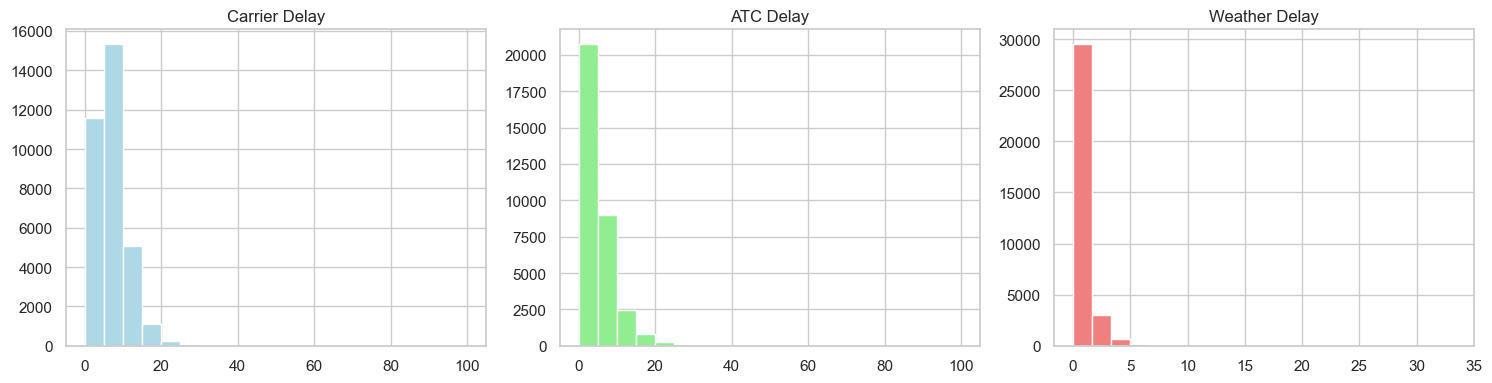

In [88]:
fig = plt.figure(figsize=(15, 4))

axes1 = fig.add_subplot(1, 3, 1) 
axes2 = fig.add_subplot(1, 3, 2) 
axes3 = fig.add_subplot(1, 3, 3)

# 각 히스토그램 그리기
axes1.hist(x=df['pct_carrier_delay'].dropna(), bins=20, color='lightblue')
axes1.set_title('Carrier Delay')

axes2.hist(x=df['pct_atc_delay'].dropna(), bins=20, color='lightgreen')
axes2.set_title('ATC Delay')

axes3.hist(x=df['pct_weather_delay'].dropna(), bins=20, color='lightcoral')
axes3.set_title('Weather Delay')

plt.tight_layout()
plt.show()

이 히스토그램은 항공 지연 요인인 항공사 자체 지연(Carrier Delay), 항공교통관제 지연(ATC Delay), 날씨 지연(Weather Delay)에 대한 비율 분포를 보여준다. 

먼저 항공사 자체 지연 그래프를 보면, 대다수의 항공편이 0-20% 사이의 지연 비율을 가지며, 특히 5-10% 구간에 빈도가 가장 높다. 이는 항공사 자체 원인으로 인한 지연이 대부분 경미하다는 것을 의미한다. 

항공교통관제 지연의 경우, 0-10% 구간에 데이터가 집중되어 있으며, 특히 0-5% 사이에 가장 많은 항공편이 분포한다. 항공사 자체 지연에 비해 전반적인 지연 비율이 낮은 편이다. 이는 항공교통관제 지연은 보통 심각하지 않지만 드물게 매우 큰 영향을 줄 수 있음을 시사한다.

마지막으로 날씨 지연은 거의 모든 데이터가 0-3% 구간에 몰려 있으며, 특히 0-1% 사이에 압도적인 빈도를 보인다. 날씨로 인한 지연은 대부분 매우 짧은 수준에서 발생한다. 이는 날씨가 항공 지연의 주된 원인이 아니며, 상대적으로 안정적인 변수임을 의미한다.

결론적으로 세 가지 지연 요인 중 날씨 지연이 가장 적고 집중도가 높으며, 항공사 지연이 가장 넓은 범위에 분포되어 있다. 이는 항공사 내부의 운용 문제나 스케줄 관리가 지연에 가장 큰 영향을 미칠 수 있음을 보여준다.

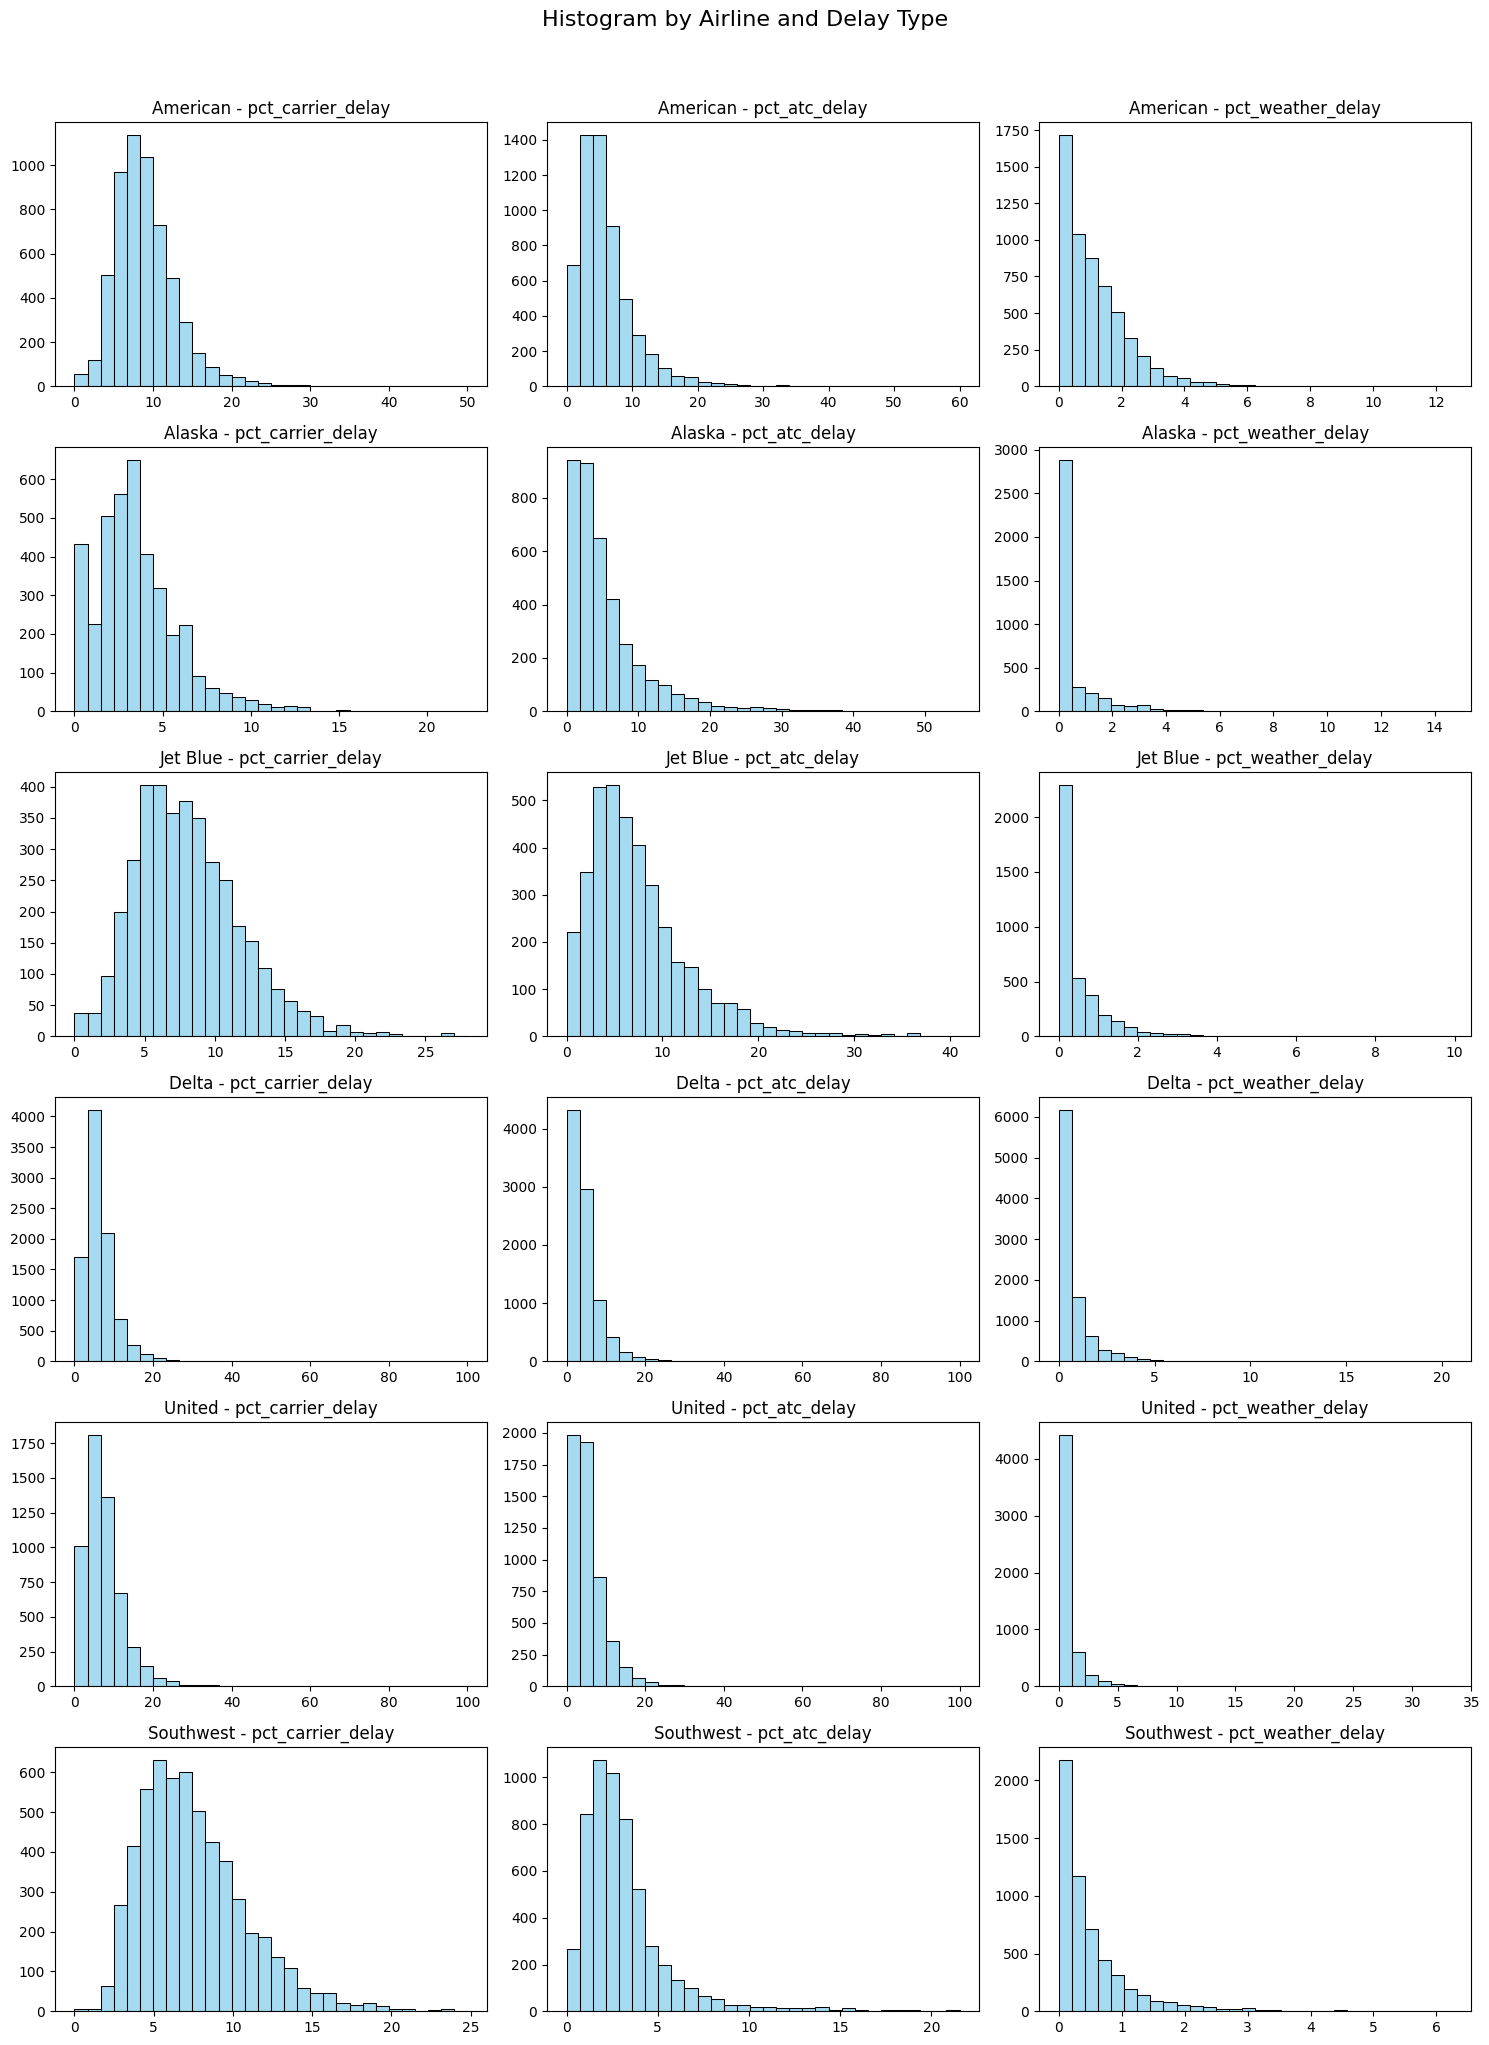

In [20]:
# 항공사 목록
airlines = df['airline'].unique()
delay_cols = ['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

# subplot 구성
fig, axes = plt.subplots(len(airlines), len(delay_cols), figsize=(15, 20))
fig.suptitle('Histogram by Airline and Delay Type', fontsize=16, y=1.02)

# 각 항공사별, 지연 유형별 히스토그램 그리기
for i, airline in enumerate(airlines):
    for j, delay in enumerate(delay_cols):
        ax = axes[i, j]
        sns.histplot(df[df['airline'] == airline][delay], bins=30, kde=False, color='skyblue', ax=ax)
        ax.set_title(f'{airline} - {delay}')
        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

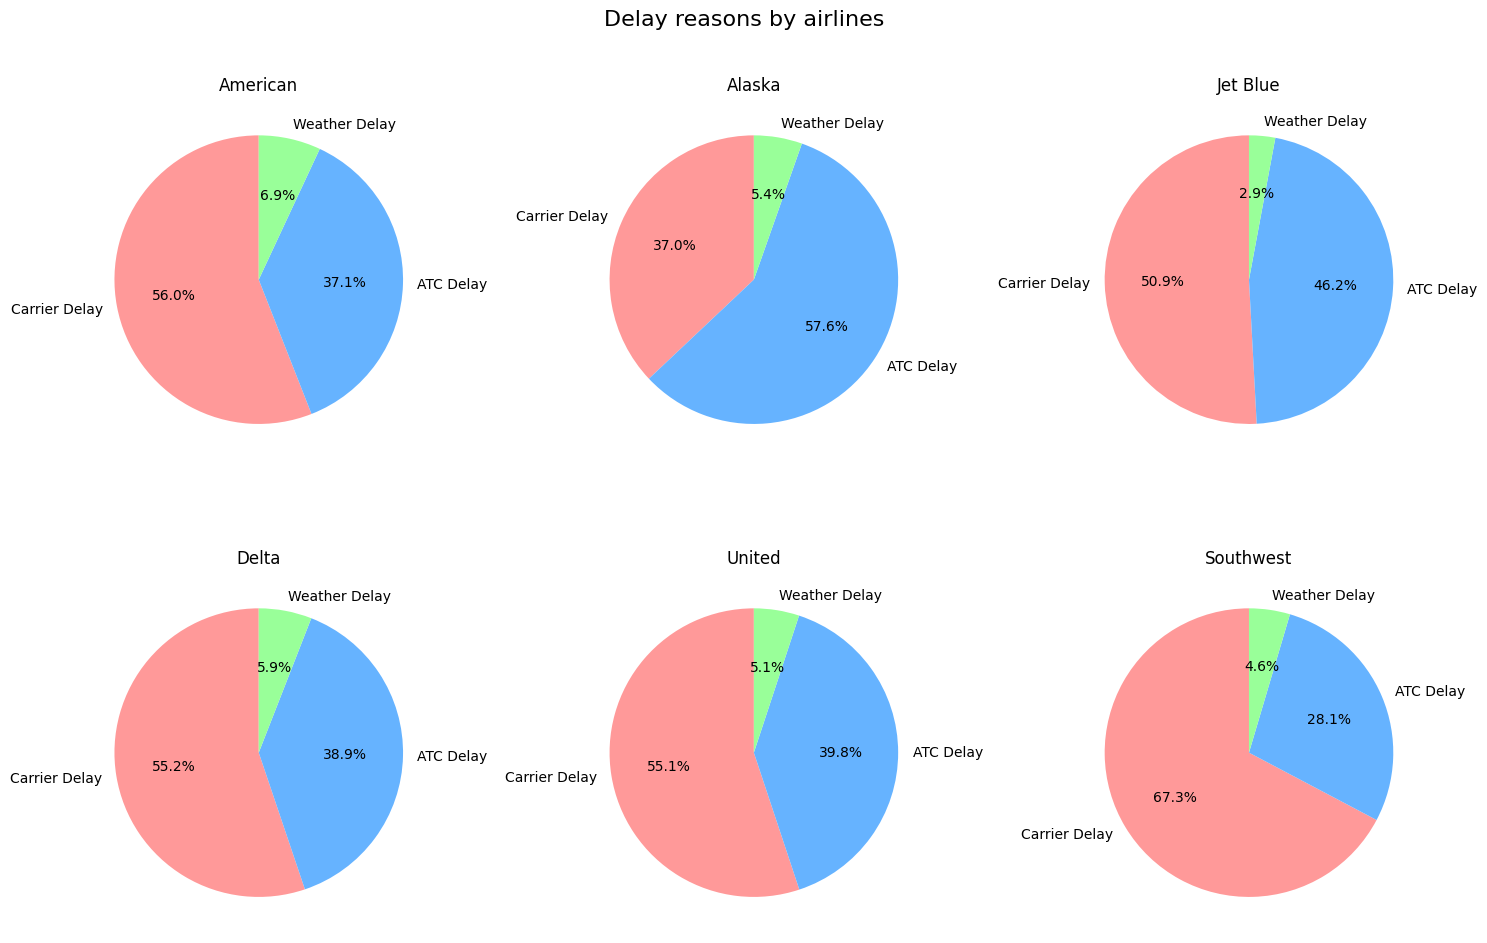

In [22]:
# 항공사 리스트
airlines = df['airline'].unique()

# 파이차트 그리기
plt.figure(figsize=(15, 10))
for i, airline in enumerate(airlines):
    plt.subplot(2, 3, i+1)
    
    # 항공사별 평균 비율 계산
    subset = df[df['airline'] == airline]
    values = [
        subset['pct_carrier_delay'].mean(),
        subset['pct_atc_delay'].mean(),
        subset['pct_weather_delay'].mean()
    ]
    labels = ['Carrier Delay', 'ATC Delay', 'Weather Delay']
    colors = ['#FF9999', '#66B3FF', '#99FF99']  # 파스텔톤 색상

    plt.pie(values, labels=labels, autopct='%.1f%%', colors=colors, startangle=90)
    plt.title(airline)

plt.suptitle('Delay reasons by airlines', fontsize=16)
plt.tight_layout()
plt.show()

대부분의 항공사의 경우 항공사 자체 지연이 과반수 이상의 비율을 차지하지만 Alaska의 경우 항공교통관제 지연이 57.6%로 과반수 이상이다. 

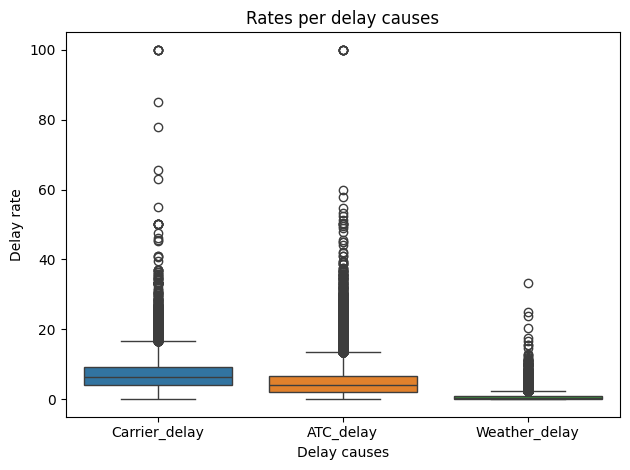

In [ ]:
# 전체 박스플롯
plt.figure()
sns.boxplot(data=df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']]) 

plt.title('Rates per delay causes')  
plt.ylabel('Delay rate')
plt.xlabel('Delay causes')
plt.xticks([0, 1, 2], ['Carrier_delay', 'ATC_delay', 'Weather_delay'])
plt.tight_layout()
plt.show()

위 박스플롯 그래프는 항공편 지연 원인별 지연 비율의 분포를 시각화한 것이다. 전체적으로 세 가지 지연 원인 모두에서 0%에서 15% 사이에 대부분의 값이 분포해 있으며, 특히 중앙값은 항공사 자체 지연에서 가장 높고, 그 다음이 항공교통관제 지연, 날씨 지연 순으로 나타난다.

각 지연 원인별로 많은 수 Outliers가 존재하는데, 이는 특정 항공편에서 지연 비율이 매우 높았음을 의미한다. 특히 항공사 자체 지연과 항공교통관제 지연의 경우 최대 100%에 가까운 지연률도 관찰된다. 반면 날씨 지연은 전체적으로 낮은 값을 가지며, 이상치도 비교적 적고 최대값도 낮은 편이다.

이 그래프를 통해 알 수 있는 점은, 항공사 자체 지연과 항공교통관제 지연이 날씨 지연보다 더 빈번하고, 영향력이 큰 경우가 많다는 것이다. 날씨 지연은 예외적인 상황에서만 높은 지연률을 보이며, 대부분의 경우 낮은 수준을 유지하고 있다. 따라서 항공사의 운영 또는 항공관제 시스템 개선이 전체 지연을 줄이는 데 더욱 효과적일 수 있음을 보여준다.

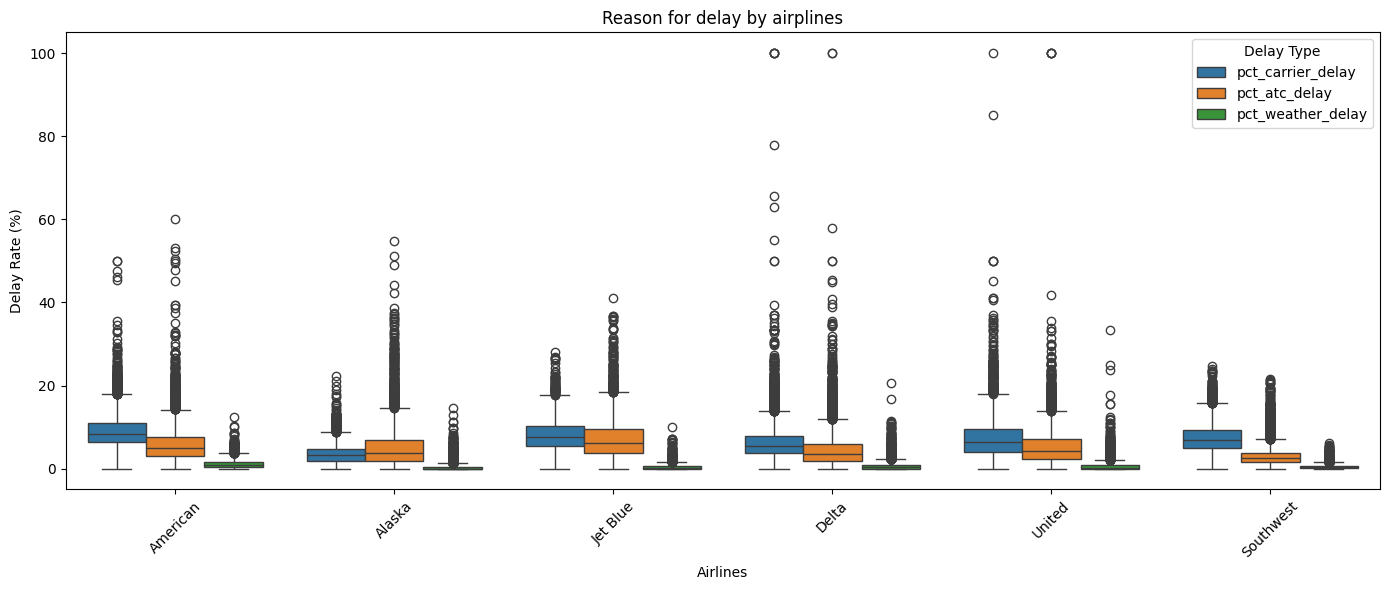

In [16]:
# 항공사별 박스플롯
# melt로 데이터 구조 변형 (long-form)
df_melted = pd.melt(
    df, 
    id_vars='airline', 
    value_vars=['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay'],
    var_name='delay_type', 
    value_name='delay_rate'
)

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_melted,
    x='airline',
    y='delay_rate',
    hue='delay_type'
)
plt.title('Reason for delay by airplines')
plt.xlabel('Airlines')
plt.ylabel('Delay Rate (%)')
plt.legend(title='Delay Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

위 그래프는 항공사별로 항공사 자체 지연, 항공교통관제 지연, 그리고 날씨 지연라는 세 가지 지연 요인에 따른 지연 비율(%)의 분포를 보여주는 박스플롯이다. 전반적으로 모든 항공사에서 가장 큰 지연 요인은 항공사 자체 지연으로 나타나며, 항공교통관제 지연은 중간 수준, 날씨 지연은 가장 낮은 수준을 보이고 있다. 특히 날씨 지연은 대부분의 항공사에서 중앙값이 거의 0에 가까워 지연에 미치는 영향이 미미한 것으로 해석된다.

항공사별로 살펴보면, Jet Blue는 세 가지 지연 원인 모두에서 중앙값이 높고 분산도 크며, 특히 항공사 자체 지연과 항공교통관제 지연에서 상대적으로 큰 지연 비율과 많은 이상치가 나타나 지연 문제가 빈번한 것으로 보인다. Delta는 항공사 자체 지연에서는 비교적 중앙값이 낮은 편이지만, 일부 극단적인 이상치가 존재하여 지연률의 편차가 있음을 보여준다. Southwest는 전반적으로 항공사 자체 지연, 항공교통관제 지연, 날씨 지연 모두에서 중앙값과 분산이 낮으며, 특히 날씨 지연은 거의 모든 값이 0에 수렴해 가장 안정적인 운항 성과를 보이는 항공사이다. United와 American은 항공사 자체 지연과 항공교통관제 지연 모두에서 이상치가 많이 발생하며, 지연률의 중앙값도 다소 높게 나타나 지연 발생 가능성이 다른 항공사에 비해 상대적으로 높은 편이다. 한편, Alaska는 대부분의 지연 항목에서 중앙값과 분산이 낮아 안정적인 편에 속하지만, 일부 극단적인 값이 존재한다.

종합적으로 볼 때, 항공사 간 지연 원인별 특성이 뚜렷하게 나타나며, 특히 항공사 자체 지연은 항공사 운영의 효율성과 직결되기 때문에 각 항공사별 개선이 필요한 핵심 지점으로 보인다. 이 분석은 항공사 서비스 개선 및 지연 원인 진단에 활용될 수 있으며, 지연률 감소를 위한 전략 수립에 실질적인 근거를 제공할 수 있다.


# 4. 2차원 데이터 분석

## 4.1 공분산 및 상관계수 분석
- 운항사 vs 관제, 기상 요인 간의 연관성 파악

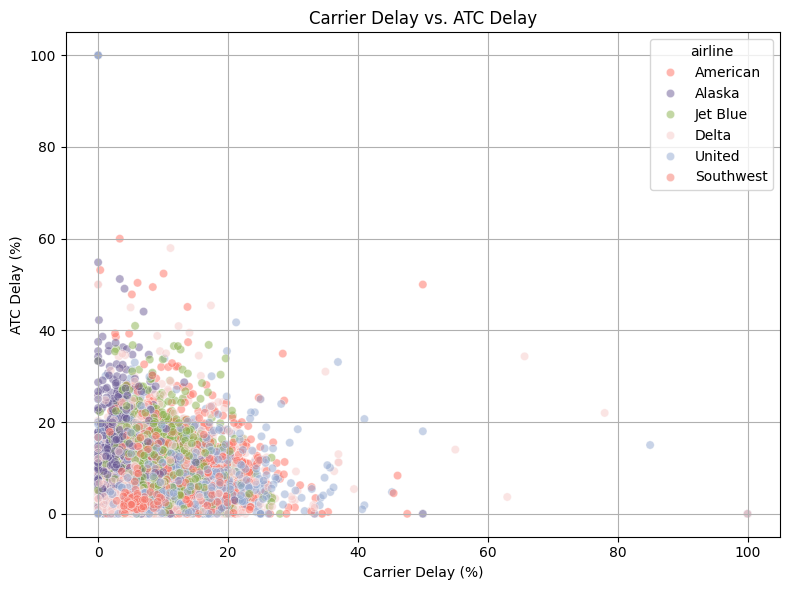

In [18]:
# Scatter plot을 이용한 carrier vs atc delay
custom_palette = {
    'American': '#FF6F61',     
    'Alaska': '#6B5B95',   
    'Jet Blue': '#88B04B',  
    'Delta': '#F7CAC9',   
    'United': '#92A8D1',    
    'Southwest': '#F7786B' 
}

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='pct_carrier_delay',
    y='pct_atc_delay',
    hue='airline',
    palette=custom_palette, # 항공사별로 색상 구분
    alpha=0.5 # 투명도 조절
)
plt.title('Carrier Delay vs. ATC Delay')
plt.xlabel('Carrier Delay (%)')
plt.ylabel('ATC Delay (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

앞서 분석한 결과에서 항공사 자체 지연과 항공교통관제 지연의 비율이 날씨 지연에 비해 상대적으로 높게 나타났기 때문에, 이 둘 중 어떤 지연 요인이 더 큰 영향을 미치는지를 파악하기 위해 추가적인 분석을 수행하였다. 위의 산점도 그래프는 항공사별 Carrier Delay(%)와 ATC Delay(%) 간의 관계를 시각화한 것이다.

그래프를 살펴보면, 대부분의 데이터가 x축(Carrier Delay)과 y축(ATC Delay) 모두 0-20% 구간에 밀집되어 있어 전반적으로 지연률은 낮은 편이다. 다만 항공사 자체 지연은 35%를 초과하는 극단적인 값(outlier)이 여러 개 존재하는 반면, 항공교통관제 지연은 대부분 40% 이하에 분포하며 상대적으로 이상치가 적다.

이러한 분포를 바탕으로 볼 때, 평균적으로는 항공교통관제 지연 비율이 다소 더 높은 경향을 보이지만, 항공사 자체 지연은 일부 항공편에서 매우 큰 지연이 발생했음을 보여준다. 따라서 해당 그래프만으로는 두 지연 요인 중 어느 하나가 더 큰 영향을 준다고 단정하기 어렵고, 보다 명확한 판단을 위해서는 추가적인 통계 분석이나 평균, 중앙값 등의 수치 비교가 필요하다.

In [94]:
# 상관관계 분석 (피어슨 상관계수)
correlation_matrix = df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr(method='pearson')

# 결과 출력
print("상관관계 분석 결과:")
print(correlation_matrix)

상관관계 분석 결과:
                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay           1.000000       0.144474           0.161474
pct_atc_delay               0.144474       1.000000           0.091729
pct_weather_delay           0.161474       0.091729           1.000000


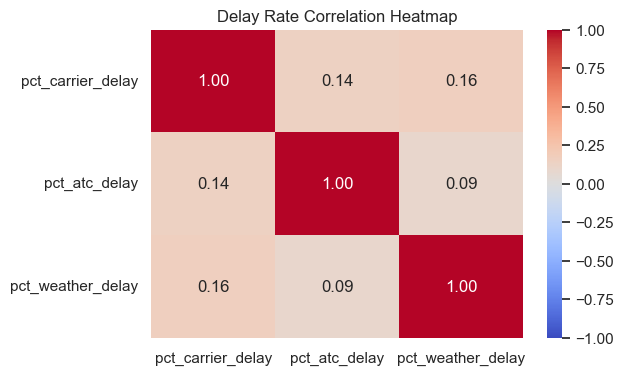

In [93]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Delay Rate Correlation Heatmap")
plt.show()

상관관계 분석 결과에 따르면, 항공사 지연 요인 간의 상관관계는 전반적으로 낮은 수준으로 나타났다. 항공사 자체 지연과 항공교통관제 지연 간의 피어슨 상관계수는 약 0.14, 항공사 자체 지연과 날씨 지연 간의 상관계수는 약 0.16으로 모두 양의 상관관계를 보이지만 그 강도는 매우 약하다. 이는 항공사 자체의 지연과 관제 또는 날씨 지연 사이에 약한 관련성이 있음을 시사하며, 서로 독립적인 원인일 가능성이 높다는 것을 의미한다. 한편, 항공교통관제 지연과 날씨 지연 사이의 상관계수도 0.09로 거의 무시할 수 있는 수준이다.

이러한 결과는 각각의 지연 원인이 독립적으로 발생하는 경향이 있으며, 특정 원인의 지연이 다른 원인의 지연을 강하게 예측하지 못함을 보여준다. 따라서 항공 지연 문제를 해결하기 위해서는 원인별로 개별적인 접근이 필요할 것으로 판단된다. 히트맵에서도 각 변수 간 색상이 옅은 붉은색에 가까워 상관관계가 약함을 시각적으로 확인할 수 있다.

In [96]:
# 공분산 행렬 계산
covariance_matrix = df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].cov()

# 결과 출력
print("공분산 분석 결과:")
print(covariance_matrix)

공분산 분석 결과:
                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay          20.228366       3.066107           0.779800
pct_atc_delay               3.066107      22.265627           0.464758
pct_weather_delay           0.779800       0.464758           1.152925


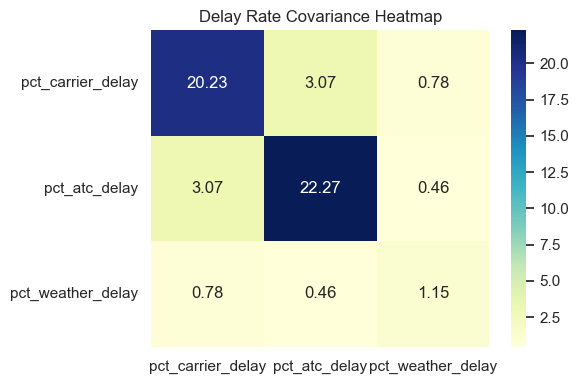

In [98]:
# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Delay Rate Covariance Heatmap")
plt.tight_layout()
plt.show()

위 공분산 분석 결과를 보면, 각 지연 요인 간의 상호 변동 관계를 확인할 수 있다. 먼저 항공사 자체 지연과 항공교통관제 지연의 공분산은 약 3.07, 항공사 자체 지연과 날씨 지연은 약 0.78, 그리고 항공교통관제 지연과 날씨 지연은 약 0.46으로 나타난다. 이는 세 지연 요인 사이에 모두 양의 공분산 관계가 있으며, 즉 하나의 지연이 증가할 때 다른 지연도 함께 증가하는 경향이 있다는 것을 의미한다.

다만 공분산 값의 절대 크기는 변수의 단위와 분포에 영향을 받기 때문에 직접적인 강도를 비교하기는 어렵다. 그럼에도 불구하고, 항공사 자체 지연과 항공교통관제 지연 사이의 공분산이 가장 크다는 점에서 이 두 지연 요인 간의 연관성이 상대적으로 강하다는 것을 유추할 수 있다. 반면, 날씨 지연은 다른 두 지연 요인에 비해 공분산 수치가 낮아 상대적으로 독립적인 요인일 가능성이 있다.

전체적으로 볼 때, 공분산 분석 결과는 앞서 확인한 상관관계 분석 결과와 유사한 방향성을 보여주며, 지연 요인 간의 연계성을 정량적으로 파악하는 데 도움을 준다.

## 4.2 다중공선성 분석
- VIF(Variance Inflation Factor) 계산 및 시각화
- VIF > 10 변수에 대한 해석

# 5. 인사이트 도출
- 운항사 지연률이 높은 항공사는 누구인가?
- 항공사별로 어떤 지연 요인이 더 영향을 미치는가?
- 정책적 개선안 제시

# 6. 결론 및 제언
- 핵심 요약: 데이터 기반 의사결정 가능
- 데이터 활용 방안 및 후속 분석 방향

# 첨부자료
- 사용한 코드 블록
- 데이터 요약 통계표 (describe() 결과)
- 참고 문헌 및 출처

## 추가: 다음 분석 방향 계획